<a href="https://colab.research.google.com/github/WahyuKhairi06/DeepLearning-WahyuKhairi-2311531009/blob/main/Praktikum%203/RNN_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


In [53]:
data = np.cos(np.linspace(0, 100, 1000)) #ubah ke cos
seq_length = 10

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(data, seq_length)
X = torch.FloatTensor(X).unsqueeze(-1)
y = torch.FloatTensor(y).unsqueeze(-1)

In [54]:
# 2. Definisi model RNN
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, output_size=1):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # ambil output terakhir
        return out


In [55]:
# 3. Inisialisasi model, loss, dan optimizer
model = RNNModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [56]:
# 4. Training loop
epochs = 50
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/50], Loss: 0.0545
Epoch [20/50], Loss: 0.0136
Epoch [30/50], Loss: 0.0021
Epoch [40/50], Loss: 0.0007
Epoch [50/50], Loss: 0.0009


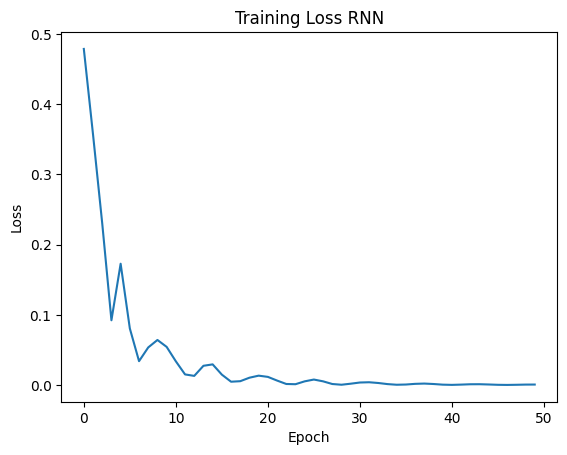

In [57]:
# 5. Plot loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss RNN')
plt.show()


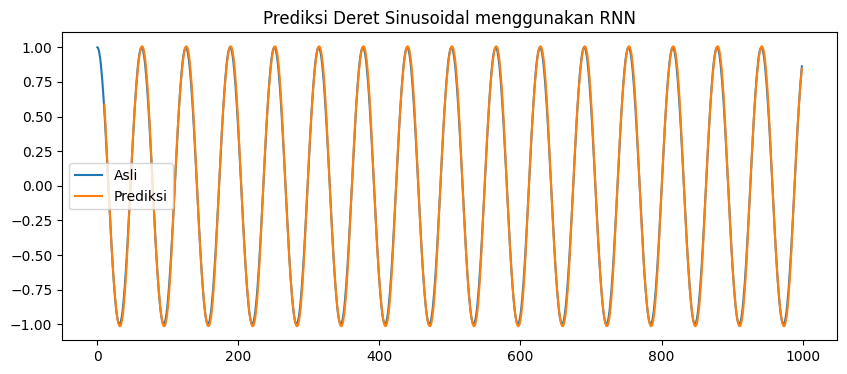

In [58]:
# 6. Prediksi
with torch.no_grad():
    preds = model(X).numpy()

plt.figure(figsize=(10,4))
plt.plot(data, label='Asli')
plt.plot(np.arange(seq_length, len(preds)+seq_length), preds, label='Prediksi')
plt.legend()
plt.title('Prediksi Deret Sinusoidal menggunakan RNN')
plt.show()




In [59]:
hidden_sizes = [16, 32, 64]
all_losses = {}
all_predictions = {}
epochs = 50

for hidden_size in hidden_sizes:
    print(f"\nTraining RNN with hidden_size = {hidden_size}")
    model = RNNModel(hidden_size=hidden_size)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    current_losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        current_losses.append(loss.item())
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    all_losses[hidden_size] = current_losses

    model.eval()
    with torch.no_grad():
        predictions = model(X).numpy()
    all_predictions[hidden_size] = predictions



Training RNN with hidden_size = 16
Epoch [10/50], Loss: 0.0548
Epoch [20/50], Loss: 0.0039
Epoch [30/50], Loss: 0.0047
Epoch [40/50], Loss: 0.0024
Epoch [50/50], Loss: 0.0009

Training RNN with hidden_size = 32
Epoch [10/50], Loss: 0.0408
Epoch [20/50], Loss: 0.0098
Epoch [30/50], Loss: 0.0010
Epoch [40/50], Loss: 0.0015
Epoch [50/50], Loss: 0.0007

Training RNN with hidden_size = 64
Epoch [10/50], Loss: 0.0132
Epoch [20/50], Loss: 0.0072
Epoch [30/50], Loss: 0.0015
Epoch [40/50], Loss: 0.0007
Epoch [50/50], Loss: 0.0003
